# <center> Adherence in a RCT mHealth dataset </center>

### Introduction
Dieses Notebook stellt verschiedene Algorithmen zur Analyse des Adherence Verhaltens von Personen aus einem gegebenen Datensatz zur Verfügung.

### Imports
Damit wir alle benötigten Algorithmen und Funktionen auch aufrufen können, importieren wir zunächst alle Python Dateien, in denen unser Code geschrieben steht.

In [ ]:
import os.path
import sys
sys.path.insert(0, os.path.normpath(os.getcwd() + os.sep + os.pardir))
sys.path.insert(0, os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + "data"))
sys.path.insert(0, os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + "util"))
sys.path.insert(0, os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + "notebook"))

from util import helper as hlp
from util import setup as set
from util import task1_phases as pha
from util import task2_groups
from util import task3_prediction as pred
from util import task4_statistics as stat
from util import task5_adherence_level as lev

import pandas as pd
import matplotlib.pylab as plt
pd.options.mode.chained_assignment = None  # default='warn'
import warnings

# FutureWarning-Warnungen ignorieren
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
print(os.path.normpath(os.getcwd() + os.sep + os.pardir))
print(os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + "util"))

C:\Users\mauri\PycharmProjects\Softwareprojekt
C:\Users\mauri\PycharmProjects\Softwareprojekt\code


### Read in data
Zuerst lesen wir den Datensatz als pandas DataFrame ein. Der Datensatz muss in einem CSV-Format vorliegen. Der Name der Datei muss dafür vorher in der Datei setup.py angegeben werden (Direkt nach s_file_name = ).

In [8]:
# Suchen des Pfades in dem der Datensatz gespeichert ist. Der Datensatz wird anschließen in ein Panda Dataframe konvertiert
dataset = hlp.find_path(setup.s_file_name)

### Group and sort data
Um mit dem Datensatz besser arbeiten zu können müssen wir diesen zunächst etwas sortieren. Dafür gruppieren wir alle user_ids, sodass die Daten eines Nutzers alle hintereinander stehen und nicht quer verteilt sind und sortieren die Daten nach dem Datum von collected_at, sodass sie auch zeitlich richtig sortiert sind. Das Ergebnis wird in der Datei dataset_sorted.csv gespeichert.

In [9]:
# Gruppieren des DataFrame nach user_id und Sortieren nach collected_at
df_sorted = hlp.group_and_sort(dataset)
df_sorted.head()

,id,user_id,locale,client,collected_at,created_at,updated_at,value_loudness,value_cumberness,value_jawbone,...,collected_at_cumberness,collected_at_jawbone,collected_at_neck,collected_at_tin_day,collected_at_tin_cumber,collected_at_tin_max,collected_at_movement,collected_at_stress,collected_at_emotion,collected_at_diary_q11
0,4,101,en,"{""device"":""iPhone"",""os"":""iOS 14.3"",""name"":""UNI...",2021-04-14T08:21:51Z,2021-04-14T08:21:51Z,2021-04-14T08:21:51Z,75,79,82,...,2021-04-14T08:21:40Z,2021-04-14T08:21:40Z,2021-04-14T08:21:43Z,2021-04-14T08:21:45Z,2021-04-14T08:21:45Z,2021-04-14T08:21:46Z,2021-04-14T08:21:48Z,2021-04-14T08:21:48Z,2021-04-14T08:21:49Z,NaN
1,5,101,en,"{""os"":""iOS 14.3"",""device"":""iPhone"",""name"":""UNI...",2021-04-14T08:23:12Z,2021-04-14T08:23:12Z,2021-04-14T08:23:12Z,33,77,76,...,2021-04-14T08:23:00Z,2021-04-14T08:23:01Z,2021-04-14T08:23:02Z,2021-04-14T08:23:03Z,2021-04-14T08:23:03Z,2021-04-14T08:23:04Z,2021-04-14T08:23:05Z,2021-04-14T08:23:05Z,2021-04-14T08:23:06Z,2021-04-14T08:23:09Z
2,9489,101,de,"{""device"":""iPhone"",""os"":""iOS 14.6"",""name"":""UNI...",2021-07-19T13:20:30Z,2021-07-19T13:20:30Z,2021-07-19T13:20:30Z,24,73,83,...,2021-07-19T13:20:21Z,2021-07-19T13:20:22Z,2021-07-19T13:20:22Z,2021-07-19T13:20:24Z,2021-07-19T13:20:24Z,2021-07-19T13:20:25Z,2021-07-19T13:20:26Z,2021-07-19T13:20:26Z,2021-07-19T13:20:27Z,NaN
3,9491,101,en,"{""device"":""iPhone"",""os"":""iOS 14.5"",""name"":""UNI...",2021-07-19T13:27:01Z,2021-07-19T13:27:01Z,2021-07-19T13:27:01Z,35,28,23,...,2021-07-19T13:26:48Z,2021-07-19T13:26:49Z,2021-07-19T13:26:50Z,2021-07-19T13:26:52Z,2021-07-19T13:26:53Z,2021-07-19T13:26:54Z,2021-07-19T13:26:55Z,2021-07-19T13:26:57Z,2021-07-19T13:26:58Z,NaN
4,9515,101,el,"{""os"":""iOS 14.6"",""name"":""UNITI 1.0.2"",""device""...",2021-07-19T14:59:32Z,2021-07-19T14:59:33Z,2021-07-19T14:59:33Z,23,75,28,...,2021-07-19T14:59:19Z,2021-07-19T14:59:21Z,2021-07-19T14:59:21Z,2021-07-19T14:59:22Z,2021-07-19T14:59:22Z,2021-07-19T14:59:24Z,2021-07-19T14:59:24Z,2021-07-19T14:59:25Z,2021-07-19T14:59:25Z,2021-07-19T14:59:28Z


### Phases
Sie können sich die den Adherence Verlauf einer einzelnen Person ausgeben lassen um direkt zu erkennen wie sich der Nutzer verhalten hat. Eine User Timeline ist die Bezeichnung für eine binäre Liste für die folgendes gilt: 0 = Der Nutzer hat die App an Tag X nicht genutzt, 1 = Der Nutzer hat die App an Tag X genutzt. Der erste Eintrag der Liste steht für den ersten Tag der Nutzung der App, der zweite Eintrag für den zweiten Tag, usw.

In [ ]:
user40176_timeline = pha.get_user_timeline(df_sorted, 40176)

Möchten Sie mehr als einen User auswerten, brauchen Sie zuerst eine Liste mit allen UserIDs aus ihrem Datensatz. Diese UserIDs bekommen Sie mit der  Methode 'get_user_ids'.

In [ ]:
all_userids = hlp.get_user_ids(df_sorted)

Um zu den Verlauf der Nutzung der App zu analysieren, müssen Sie zuerst wissen an welchen Tagen die Nutzung der App besonders hoch oder niedrig war. Dazu können Sie sich mit der Methode 'get_all_adherence_percentage' die prozentuale Nutzung der App ausgeben lassen. Zuvor biete es sich an einmal die Methode 'get_all_user_timelines' auszurufen um alle User Timelines

In [ ]:
all_timelines = pha.get_all_user_timelines(df_sorted)

adherence_percentages = pha.get_all_adherence_percentage(all_userids)

plt.plot(adherence_percentages)
plt.show()

Nun sind alle Voraussetzungen erfüllt um den Datensatz auf das Vorhandensein von Phasen zu untersuchen. Dafür nutzt dieses Paket drei verschiedene CPD-Algorithmen zur aus dem Ruptures package (CPD = Change point detection). Die gefundenen Change Points der drei Algorithmen geben an, in welche Phasen sich der zeitliche Verlauf unterteilt.
1. Binary Segmentation
2. Bottom-Up Segmentation
3. Window Segmentaion

Bevor Sie die Algorithmen anwenden, müssen Sie angeben noch welchen Kriterien Sie Chane Points suchen.
Wenn Sie eine feste Anzahl an Change Points suchen, müssen Sie folgende Einstellungen vornehmen:
    s_cpd_mode: True = Feste Anzahl an Change Points
    s_num_change_points: Anzahl der Change Points

In [ ]:
set.s_cpd_mode = True
set.s_num_change_points = 3

Soll die Anzahl der Change Points dynamisch sein, sollten Sie einen Schwellenwert angeben und folgende Einstellungen vornehmen:
    s_cpd_mode: False = Schwellenwert für die Bestimmung von Change Points
    s_pen_change_points: Höhe des Schwellenwerts für die Bestimmung der Change Points

In [ ]:
set.s_cpd_mode = False
set.s_pen_change_points = 2

Da nun die notwendigen Einstellungen vorgenommen wurden, können Sie die Phasen mit Hilfe der CPD-Algorithmen bestimmen.

In [ ]:
result_binseg = pha.cpd_binseg(adherence_percentages)

result_botupseg = pha.cpd_botupseg(adherence_percentages)

result_windowseg = pha.cpd_windowseg(adherence_percentages)

### Prediction of a users adherence behaviour
In dieser Task geht es darum die Adherence eines neuen Nutzers für einen bestimmten Tag y in der Zukunft vorherzusagen. Dies geschieht mithilfe der Daten des neuen Nutzers und mithilfe des Datensatzes. Zuerst lesen wir den Datensatz unseres Nutzers ein. Dann wird im Datensatz nach den k-ähnlichsten Nutzern nach Adherence-Level gesucht. Auf diesen Nutzern wird ein Modell trainiert, welches die einzelnen Zeilen darauf trainiert, ob sie an Tag y adherent sind oder nicht. Für dieses Modell wird eine k-fold-cross validation ausgeführt, um die Accuracy des Modells festzulegen. Zum Schluss wird mithilfe der Daten unseres neuen Nutzers die Adherence-Wahrscheinlichkeit an Tag y berechnet und ausgegeben.

In [5]:
new_user = 'C:/Users/mauri/PycharmProjects/Softwareprojekt/data/user_2107.csv'
df_newuser = pd.read_csv(new_user)

# der gesuchte Tag in der Zukunft, für den die Adherence-Wahrscheinlichkeit berechnet wird
day_y = 10
# Variable für den knn-Algorithmus der nach den ähnlichsten Nutzern nach Adherence-Level sucht
nearest_neighbors = 10
# Variable für die k-fold-cross-valdation, mit der die Accuracy des Modells getestet wird
cv = 10
# Wahl des ML-Modells: 0 --> für RandomForest, 1 --> für Support Vector Machines
model = 0

pred.task3_prediction(df_sorted, df_newuser, day_y, nearest_neighbors, cv, model)

2107: 0.8638211382113821, 492



C:\Users\mauri\anaconda3\envs\Softwareprojekt\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Die 10 ähnlichsten Nutzer sind:
     user_id  adherence_level
47    2107.0         0.863821
623  42251.0         0.862745
341  18181.0         0.866667
335  18169.0         0.866667
567  40362.0         0.866667
315  18129.0         0.866667
374  34242.0         0.859813
524  40176.0         0.868132
348  34131.0         0.858824
216   6388.0         0.858696

Durchschnittliche Test Accuracy RandomForest-Modell: 0.984
Adherencewahrscheinlichkeit an Tag 10: 0.93


### Statistics
In dieser Task geht es darum die Phasen und die Gruppen aus Task 1 und 2, sowie einige weitere Statistiken zu einem bestimmten Nutzer in einer Übersicht darzustellen.

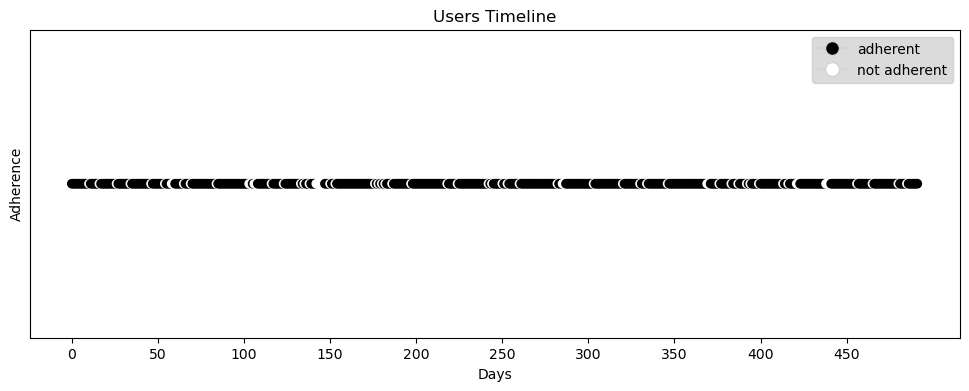

In [10]:
user_id = 2107
stat.show_user_timeline(df_sorted, user_id)

In [ ]:
stat.show_user_statistics(df_sorted, user_id)

### Task 5 Adherence Level

#### Get User adherence percentage

get_user_adh_percentage(df_sorted, user_id, start_day=None, end_day=None, column=s_table_sort_by):

adh_percentage wird berechent aus der Anzahl an adherenten Tagen in der Timeline / Anzahl aller Tage in der Timeline
start_day und end_day angeben wie in get_user_timeline() um adh_percentage in einer bestimmten timeline zu bekommen. Stanadard mäßig gesamte timeline.
returned adh_percentage eines bestimmten Users in einer bestimmten Timeline als float Wert.

In [4]:
id_user = 111

start_day = 20
end_day = 120
column = 's_table_sort_by'

lev.get_user_adh_percentage(df_sorted,id_user,start_day,end_day,column)

NameError: name 'lev' is not defined

#### Get User adherence level

get_user_adh_level(df_sorted, adh_level, full_adh_threshold=80, non_adh_threshold=40, start_day=None, end_day=None) :

Labeled user nach ihren adh_level. 3 Gruppen: Fully adherent, partially adheren, non-adherent.
Über adh_level gibt der User an, welche von den Gruppen er haben möchte.
1 = non-adherent; 2 = partial; 3 = fully adherent. User kann auch angeben, welchen Threshold er haben möchte für die adh_level. Also bis wieviel Prozent adh_percentage ein
User noch als fully_adherent gilt, oder bis wie viel Prozent adh_percentage ein User noch als non-adherent gilt. Standardmäßg ist der Threshold bei 80 Prozent für fully
adherent und 40 Prozent bei non-adherent.
Über start_day und end_day kann der user wieder angeben, in welcher bestimmten timeline er das adh_level bestimmen möchte, wobei wieder standardmäßig gesamte timeline
benutzt wird.
returned ein Array von Usern, welche die Eingabekriterien erfüllen. Also welches von den 3 adh_level und in welche Timeline und mit welcher Threshold.

In [ ]:
adh_level = 1
full_adh_threshold = 80
non_adh_threshold = 40
start_day = 20
end_day = 120

x = lev.get_user_adh_level(df_sorted, adh_level, full_adh_threshold, non_adh_threshold,start_day,end_day)
print(x)

# Tests

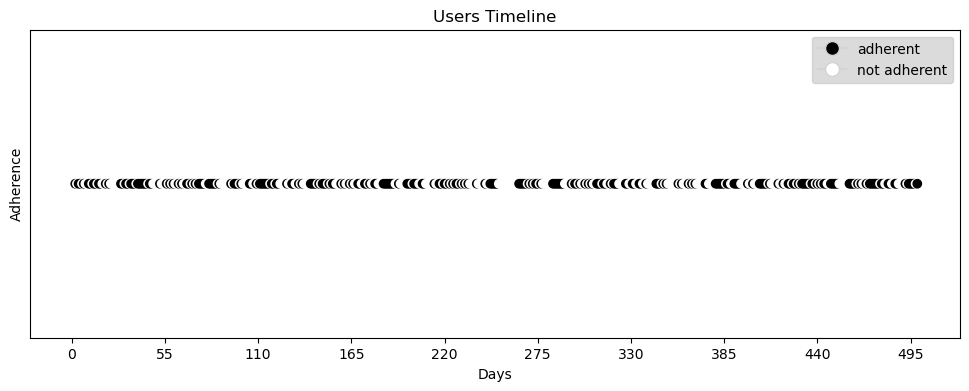